<a href="https://colab.research.google.com/github/JanakPatel09/MachineLearning/blob/main/Income_%26_Spent_Analysis_using_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income & Spent Analysis using Hierarchical Clustering

In [8]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load dataset from local directory

from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [9]:
#Load dataset and Summary

dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.describe())
print(dataset.head())

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [10]:
# Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["Gender"] = label_encoder.fit_transform(dataset["Gender"])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


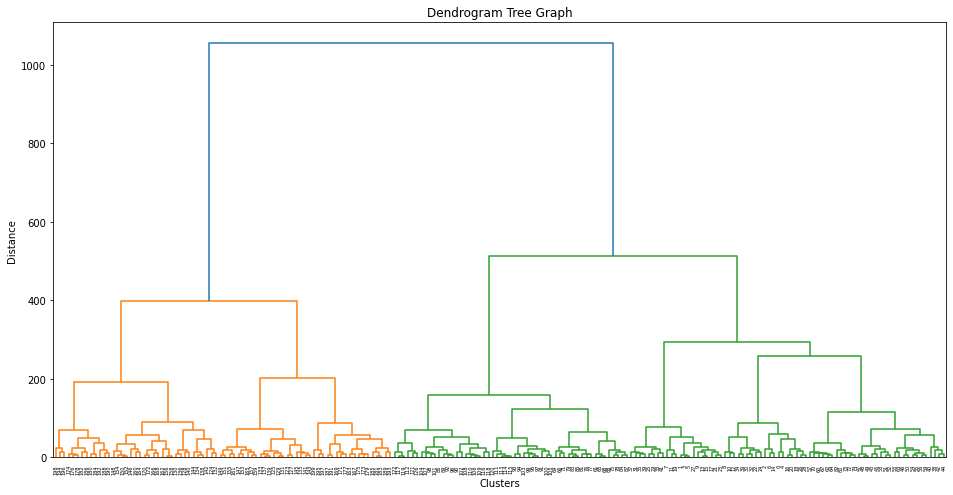

In [11]:
# Dendrogram Data Visualization

import scipy.cluster.hierarchy as clus
plt.figure(1, figsize=(16,8))
dendrogram = clus.dendrogram(clus.linkage(dataset, method = "ward"))
plt.title("Dendrogram Tree Graph")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()

In [12]:
 # Fitting the Hierarchy Clustering to the dataset with n = 5

 from sklearn.cluster import AgglomerativeClustering
 model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
 y_means = model.fit_predict(dataset)
 print(y_means)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


# Visualizing the number clusters n = 5

## Cluster 1 - Customers with High Income and Low Spending
## Cluster 2 - Customers with High Income and High Spending
## Cluster 3 - Customers with Medium Income and Medium Spending
## Cluster 4 - Customers with Low Income and Low Spending
## Cluster 5 - Customers with Low Income and High Spending


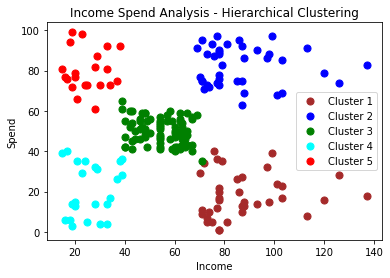

In [13]:
X = dataset.iloc[:,[3,4]].values
plt.scatter(X[y_means==0,0], X[y_means==0,1], s=50, c='brown', label='Cluster 1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_means==3,0], X[y_means==3,1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_means==4,0], X[y_means==4,1], s=50, c='red', label='Cluster 5')
plt.title("Income Spend Analysis - Hierarchical Clustering")
plt.xlabel("Income")
plt.ylabel("Spend")
plt.legend()
plt.show()